In [2]:
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [25]:
Loans= pickle.load( open( "predicted_sectors_2.pkl", "rb" ) )
print(type(Loans))
Loans.head()

<class 'pandas.core.frame.DataFrame'>


,id,Project Name,sector_id,major_sector_name,supervised_predictions,predicted_sector
0,658601468273303198,Industry and Trade Policy Adjustment Loan,NaN,NaN,5,Industry and Trade/Services
1,784351468234894668,Third Agricultural Research Project,NaN,NaN,0,Agriculture
2,891941468049466312,Rubber Industry Smallholders\n Deve...,NaN,NaN,0,Agriculture
3,125511468051878371,Highway Rehabilitation and Improvement Project,9.0,Transportation,9,Transportation
4,733341468033245855,Abidjan Environmental Protection Project,NaN,NaN,7,Public Admin


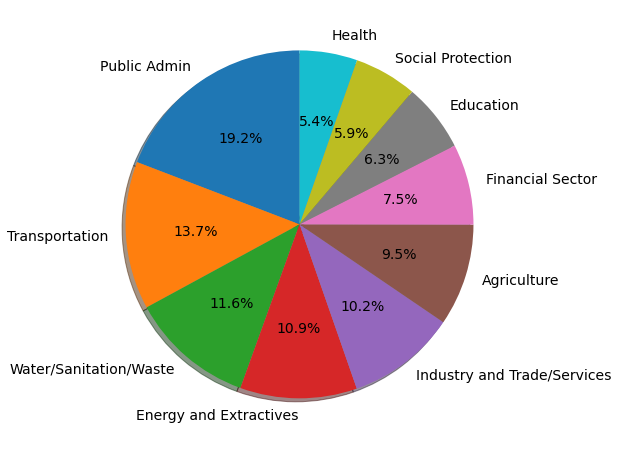

In [26]:
sectors = Loans.predicted_sector.value_counts()
percent = sectors/sum(sectors)*100
# print(percent)

fig, ax = plt.subplots(figsize=(8,8))
patches, texts, autotexts=ax.pie(percent,labels=sectors.index, autopct='%1.1f%%',
        shadow=True, startangle=90)

for text in texts:
    text.set_fontsize(14)    
for text in autotexts:
    text.set_fontsize(14)
plt.show()


fig.savefig('Sector_2_distribution.png')

In [39]:
loan_date = pd.read_csv('id_date_country.csv')
loan_date.head()
loan_date.dtypes

id               int64
date            object
country_code    object
country_name    object
filename        object
dtype: object

In [41]:
Loan_full = Loans.merge(loan_date, on='id')
Loan_full.head(10)

,id,Project Name,sector_id,major_sector_name,supervised_predictions,predicted_sector,date,country_code,country_name,filename
0,658601468273303198,Industry and Trade Policy Adjustment Loan,NaN,NaN,5,Industry and Trade/Services,1990-01-05,jo,Jordan,1990_january_5_658601468273303198_conformed-co...
1,784351468234894668,Third Agricultural Research Project,NaN,NaN,0,Agriculture,1990-01-10,br,Brazil,1990_january_10_784351468234894668_conformed-c...
2,891941468049466312,Rubber Industry Smallholders\n Deve...,NaN,NaN,0,Agriculture,1990-01-11,ma,Morocco,1990_january_11_891941468049466312_conformed-c...
3,125511468051878371,Highway Rehabilitation and Improvement Project,9.0,Transportation,9,Transportation,1990-01-11,ma,Morocco,1990_january_11_125511468051878371_conformed-c...
4,733341468033245855,Abidjan Environmental Protection Project,NaN,NaN,7,Public Admin,1990-01-16,ivc,Cote d'Ivoire,1990_january_16_733341468033245855_conformed-c...
5,707061468302738531,Technical Assistance Project,NaN,NaN,7,Public Admin,1990-01-25,tr,Turkey,1990_january_25_707061468302738531_conformed-c...
6,982071468334274747,Structural Adjustment Loan,NaN,NaN,5,Industry and Trade/Services,1990-01-25,tr,Turkey,1990_january_25_982071468334274747_conformed-c...
7,669111468337266603,Agricultural Credit and Export Promotion Project,NaN,NaN,0,Agriculture,1990-01-31,zim,Zimbabwe,1990_january_31_669111468337266603_conformed-c...
8,537611468095360158,Third Regional Development Project,NaN,NaN,5,Industry and Trade/Services,1990-02-01,waf,West African Monetary Union (?),1990_february_1_537611468095360158_west-africa...
9,328621468247829056,Istria Water Supply and Sewerage Project,10.0,Water/Sanitation/Waste,10,Water/Sanitation/Waste,1990-02-01,yu,Yugoslavia,1990_february_1_328621468247829056_conformed-c...


Public Admin
Transportation
Water/Sanitation/Waste
Energy and Extractives
Industry and Trade/Services


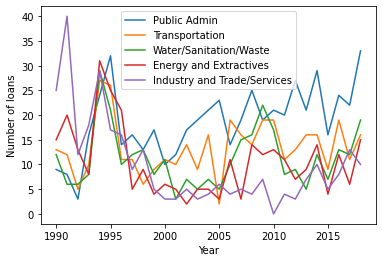

In [47]:
secs = sectors.index

fig,ax=plt.subplots()
for sec in secs[:5]:
    print(sec)
    subset = Loan_full[Loan_full.predicted_sector==sec]
    
    year=np.array([])
    for date in subset.date:
        whichyear = datetime.datetime.strptime(date,'%Y-%m-%d').year
        year=np.append(year,whichyear)
        
    yearly=np.histogram(year, bins=np.arange(1990,2020,))
    ax.plot(yearly[1][:-1],yearly[0],label=sec)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of loans')

ax.legend()    